# Linear Regression with Python

## Linear Regression from scratch using NumPy

### What is linear regression?
Linear Regression attempts to find a relationship between a dependent variable and one or more explantory (or independent) variables. In case of simple linear regression where there is only one explanatory variable, linear regression is described as a general equation as shown below.

\begin{align}
y = b_0 + b_1x + \epsilon
\end{align}

where y is the dependent variable, x is the explanatory variable with coefficient b<sub>1</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

For multiple linear regression, we have two or more explanatory variables so the equation. It is described as a general equation as shown below. 

\begin{align}
y = b_0 + b_1x_1 + ... + b_px_p + \epsilon 
\end{align}

where y is the dependent variable, x<sub>1</sub>...x<sub>p</sub> are the explanatory variables with regression coefficients b<sub>1</sub>...b<sub>p</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### About the dataset
This is a simulated dataset made for teaching regression containing 10 independent variables named **Feat01, Feat02..., Feat10** and a dependent variable called **Target**. 

### The task
The task at hand is to predict the **Target** variable such that the values of predictions are as close to the actual values as possible. This will be done using a baseline linear regression model made from scratch using numpy.

In [2]:
# Loading data
data = pd.read_csv("data.csv")
data.head()

,Feat01,Feat02,Feat03,Feat04,Feat05,Feat06,Feat07,Feat08,Feat09,Feat10,Target
0,0,11617.463,135.935905,10960,491.597396,80.714963,0.675678,16.891946,0.506758,1.198996,137
1,0,1086607.005,1983.900611,13065,1391.028397,64.221576,0.880523,0.146754,0.146754,1.230974,335
2,0,37945.952,2726.252884,8772,222.952910,37.589307,0.325336,16.266790,0.488004,1.208015,172
3,0,79471.821,3448.065646,36414,883.345912,662.170505,0.257565,0.000000,0.128782,1.256901,867
4,1,5486.580,1509.753541,13040,742.253326,99.315014,0.129816,0.000000,0.129816,1.255410,815


In [3]:
X = data.drop(["Target"],axis=1) # Explanatory(independent) variables
y = data["Target"] # Dependent variable

### Train/test split
Data is divided into training and test set. Training set is used to train the linear model and test set is used evaluate the trained model. Here, we are using 70% data in the training set, leaving 30% data for the test set. The train-test set ratio is determined keeping in mind the size of data. Larger test sets (around 20-30% data) provide more reliable evaluation results but at the same time training set should be enough so that underfitting does not occur.  

In [4]:
# A 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)

First, we will train a simple linear regression model using scikit-learn using one variable and then do the same from scratch and compare results. Now, there are many methods available for performing linear regression from scratch using only the numerical computing library, Numpy. A simpler method among these focuses on estimating the intercept and model coefficients. This method is intuitive for beginners. For a simple linear regression model, we need to find out the values of b<sub>0</sub> and b<sub>1</sub>.

b<sub>1</sub> can be defined as:

\begin{align}
b_1 = \frac{\sum_{i=1}^n (x - \bar{x}) (y - \bar{y})}{\sum_{i=1}^n (x - \bar{x})^2}
\end{align}

b<sub>0</sub> can be defined as:

\begin{align}
b_0 = y - b_1x
\end{align}

We just have to recreate these formulae in numpy and take predictions.

For this demonstration, we have chosen a feature at random: Feat06

### Simple Linear Regression using Scikit-learn

b1 = 0.7091502147233009 b0 = 355.4999157545228
The R-squared score is 0.3708
The Root Mean Squared error is 205.5285


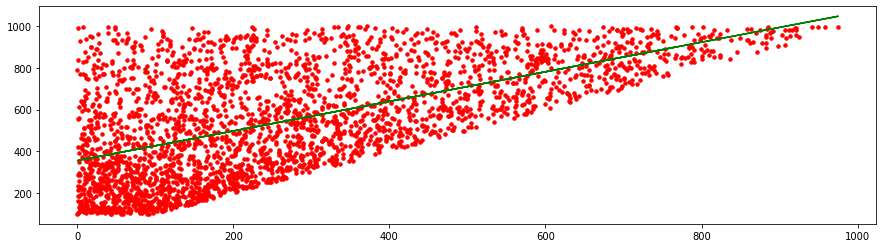

In [5]:
simple_lr = LinearRegression() 
simple_lr.fit(X_train[["Feat06"]],y_train) # Training a model simple_lr using only one feature
simple_lr_preds = simple_lr.predict(X_test[["Feat06"]]) # Taking predictions for the test set

print("b1 =",simple_lr.coef_[0],"b0 =",simple_lr.intercept_)
# R-squared score
print("The R-squared score is {:.4f}".format(r2_score(y_test,simple_lr_preds)))
# RMSE
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,simple_lr_preds))))

plt.figure(figsize=(15,4))
plt.scatter(X_test[["Feat06"]].values,y_test,color="red",s=12)
plt.plot(X_test[["Feat06"]].values,simple_lr_preds,color="green")
plt.show()

A near perfect fit for the scatter plot. Let's if we can replicate this using scatter plot.

### Simple Linear Regression from scratch

b1 = 0.7091502147233003 b0 = 355.49991575452293
The R-squared score is 0.3708
The Root Mean Squared error is 205.5285


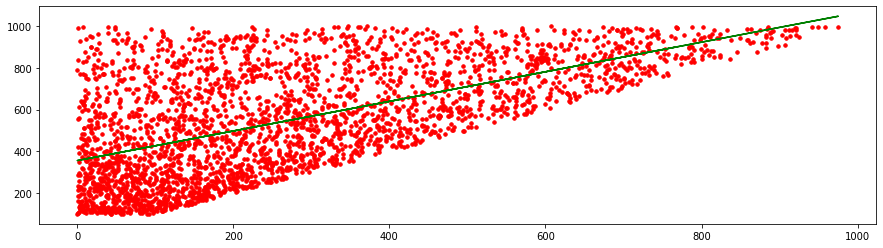

In [6]:
# computing b1
X_train_scratch = X_train[["Feat06"]].values.flatten() # Preparing training set
X_test_scratch = X_test[["Feat06"]].values.flatten() # Preparing test set

numerator_b1 = np.sum((X_train_scratch - np.mean(X_train_scratch))*(y_train - np.mean(y_train)))
denominator_b1 = np.sum((X_train_scratch - np.mean(X_train_scratch))**2)

b1 = numerator_b1 / denominator_b1 # calculating b1

b0 = np.mean(y_train) - b1*np.mean(X_train_scratch) # calculating b0

simple_lr_scratch_preds = b0 + b1*X_test_scratch # taking predictions

print("b1 =",b1,"b0 =",b0)
# R-squared score
print("The R-squared score is {:.4f}".format(r2_score(y_test,simple_lr_scratch_preds)))
# RMSE
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,simple_lr_scratch_preds))))

plt.figure(figsize=(15,4))
plt.scatter(X_test_scratch,y_test,color="red",s=12)
plt.plot(X_test_scratch,simple_lr_scratch_preds,color="green")
plt.show()

We have almost identical results for both cases. But this works only for a single independent variable but what about the cases where we have more than one independent variables. Here, we can use normal use normal equation method.

### Normal equation method 
Given a hypothesis function:

\begin{align}
h_\theta(x) = \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n
\end{align}

We have to minimize the cost function:

\begin{align}
J(\theta_{0...n}) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2
\end{align}

Where x<sup>(i)</sup> is the i<sup>th</sup> sample (from a set of m samples) and y<sup>(i)</sup> is the i<sup>th</sup> expected result.

After differentiating this equation, we get the following:

\begin{align}
\theta = (X^TX)^{-1}X^Ty
\end{align}

where X is the feature matrix and y is the target variable vector.

You can check the full derivation here: [Source](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression)

We can use this equation to get the best hypothesis parameters i.e., the intercept and beta coefficients.

### Multiple Linear Regression using Scikit-learn

In [7]:
multiple_lr = LinearRegression() 
multiple_lr.fit(X_train,y_train) # Training a model multiple_lr using all features
multiple_lr_preds = multiple_lr.predict(X_test) # Taking predictions for the test set

# R-squared score
print("The R-squared score is {:.4f}".format(r2_score(y_test,multiple_lr_preds)))
# RMSE
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,multiple_lr_preds))))
print("Intercept =",multiple_lr.intercept_)
model_coefs = pd.DataFrame({'Feature/Column': list(X_train.columns), 'Coefficient': multiple_lr.coef_})
model_coefs

The R-squared score is 0.8978
The Root Mean Squared error is 82.8497
Intercept = -13397.877366112254


,Feature/Column,Coefficient
0,Feat01,2.319425
1,Feat02,0.000010
2,Feat03,0.006078
3,Feat04,0.001139
4,Feat05,0.013329
5,Feat06,0.111174
6,Feat07,0.511887
7,Feat08,-0.123155
8,Feat09,-16.116907
9,Feat10,11177.060571


### Multiple Linear Regression from scratch

In [8]:
X_scratch = X_train.copy() # Making a copy of training set so that the original training set doesn't alter

In [9]:
# Checking and reshaping to ensure a 2D training set
if len(X_scratch.shape) == 1:
    X_scratch = X_scratch.reshape(-1,1)
X_scratch.shape

(7000, 10)

The normal equation is created such that each coefficient in the model has an input of some kind to be multiplied against. A column of ones is therefore is added to calculate the intercept term.

In [10]:
# Adding column of ones
ones = np.ones(X_scratch.shape[0]).reshape(-1,1)
X_scratch = np.concatenate((ones,X_scratch),1)

We will create the equation sequentially with code.

\begin{align}
X^TX
\end{align}

Shape of the matrix: (11, 11)


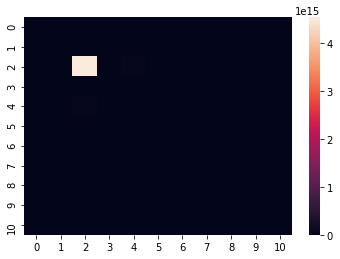

In [11]:
coefs = np.linalg.inv(X_scratch.transpose().dot(X_scratch)).dot(X_scratch.transpose()).dot(y_train)
coefs = X_scratch.transpose().dot(X_scratch) # dot product of training features' matrix and its transpose
print("Shape of the matrix:",coefs.shape) # 10 features + intercept
sns.heatmap(coefs) # A visualization of the matrix in the form of a heatmap
plt.show()

\begin{align}
(X^TX)^{-1}
\end{align}

Shape of the matrix: (11, 11)


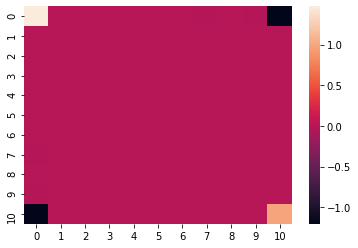

In [12]:
coefs = np.linalg.inv(X_scratch.transpose().dot(X_scratch))
print("Shape of the matrix:",coefs.shape)
sns.heatmap(coefs) # See the effect of inversion
plt.show()

\begin{align}
(X^TX)^{-1}X^T
\end{align}

Shape of the matrix: (11, 7000)


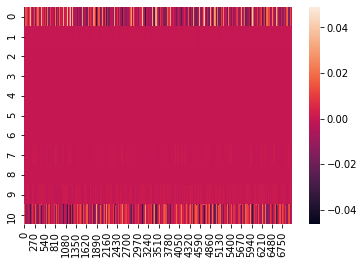

In [13]:
coefs = np.linalg.inv(X_scratch.transpose().dot(X_scratch)).dot(X_scratch.transpose())
print("Shape of the matrix:",coefs.shape)
sns.heatmap(coefs)
plt.show()

\begin{align}
(X^TX)^{-1}X^Ty
\end{align}

Shape of the matrix: (11,)


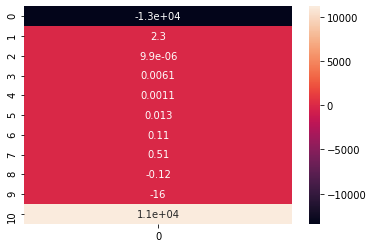

In [14]:
coefs = np.linalg.inv(X_scratch.transpose().dot(X_scratch)).dot(X_scratch.transpose()).dot(y_train)
print("Shape of the matrix:",coefs.shape)
sns.heatmap(coefs.reshape(-1,1),annot=True) # Final coefficients
plt.show()

In [15]:
intercept = coefs[0]
betas = coefs[1:]

In [16]:
multiple_lr_scratch_preds = []
for i in range(len(X_test)):
    dot_product = X_test.iloc[i,:].values.dot(np.array(betas))
    prediction = intercept + dot_product
    multiple_lr_scratch_preds.append(prediction)
multiple_lr_scratch_preds = np.array(multiple_lr_scratch_preds)

In [17]:
print("Evaluation of normal equation based model")
print("The R-squared score is {:.4f}".format(r2_score(y_test,multiple_lr_scratch_preds)))
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,multiple_lr_scratch_preds))))
print("Intercept =",intercept)
model_coefs_scratch = pd.DataFrame({'Feature/Column': list(X_train.columns), 'Coefficient': betas})
model_coefs_scratch

Evaluation of normal equation based model
The R-squared score is 0.8978
The Root Mean Squared error is 82.8497
Intercept = -13397.8773660329


,Feature/Column,Coefficient
0,Feat01,2.319425
1,Feat02,0.000010
2,Feat03,0.006078
3,Feat04,0.001139
4,Feat05,0.013329
5,Feat06,0.111174
6,Feat07,0.511887
7,Feat08,-0.123155
8,Feat09,-16.116907
9,Feat10,11177.060571


The normal equation appproach built from scratch gives almost identical results to the scikit-learn model. We can calculate RMSE between the scikit-learn model and normal equation model to check difference in their predictions.

In [18]:
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(multiple_lr_preds,multiple_lr_scratch_preds))))

The Root Mean Squared error is 0.0000


**Conclusion:** As the RMSE is 0.0, we have successfully replicated the scikit-learn model using a normal equation based approach from scratch.